In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply a consistent plotting style
plt.style.use('seaborn-v0_8')


In [2]:
def load_aggregated_data():
    """
    Return the aggregated Titanic datasets.
    
    Returns:
        deaths (dict): total, male, and female death counts.
        fallout (dict): financial fallout by category.
    """
    deaths = {'total': 1500, 'male': 1200, 'female': 300}
    fallout = {
        'categories': ['Legal Claims', 'Insurance Payouts', 'Fleet Changes'],
        'values': [6, 9, 4]
    }
    return deaths, fallout

# Step 1: Gather
deaths, fallout = load_aggregated_data()


In [3]:
def summarize_deaths(deaths: dict) -> pd.DataFrame:
    """
    Compute counts and percentages of Titanic deaths.
    """
    total = deaths['total']
    male = deaths['male']
    female = deaths['female']
    male_pct = male / total * 100
    female_pct = female / total * 100
    summary = {
        'Total Deaths': total,
        'Male Deaths': male,
        'Female Deaths': female,
        'Male %': male_pct,
        'Female %': female_pct
    }
    return pd.DataFrame([summary])

# Step 2: Assess
df_death_summary = summarize_deaths(deaths)
df_death_summary


,Total Deaths,Male Deaths,Female Deaths,Male %,Female %
0,1500,1200,300,80.0,20.0


In [4]:
# Step 3: Clean
# No cleaning needed—data is aggregated and complete.


In [5]:
def create_bar_plot(ax, categories, values, title, ylabel, label_fmt, color=None):
    """
    Plot a bar chart with annotated labels.
    """
    bars = ax.bar(categories, values, color=color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    offset = max(values) * 0.05
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + offset,
            label_fmt.format(height),
            ha='center'
        )
    return bars


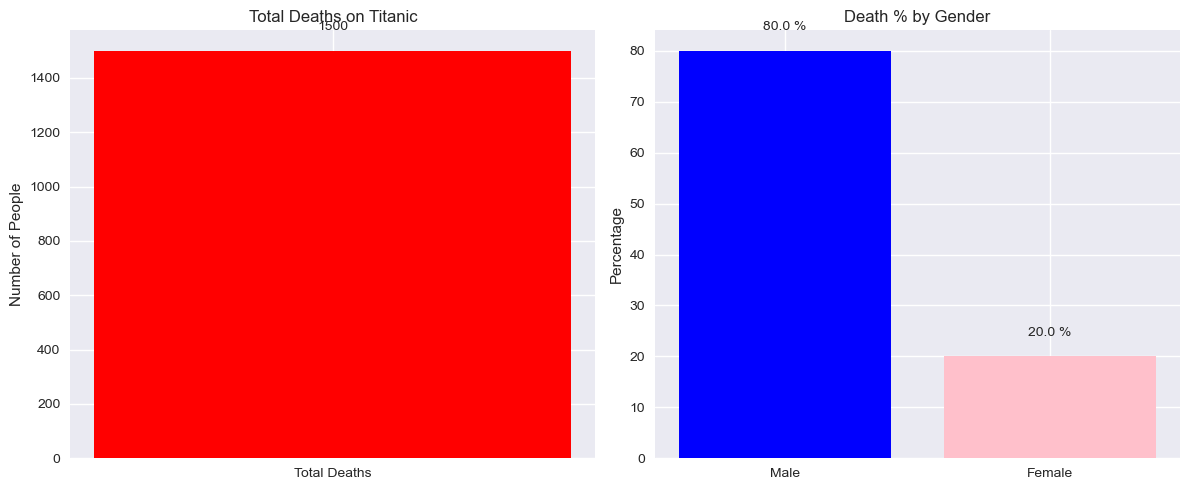

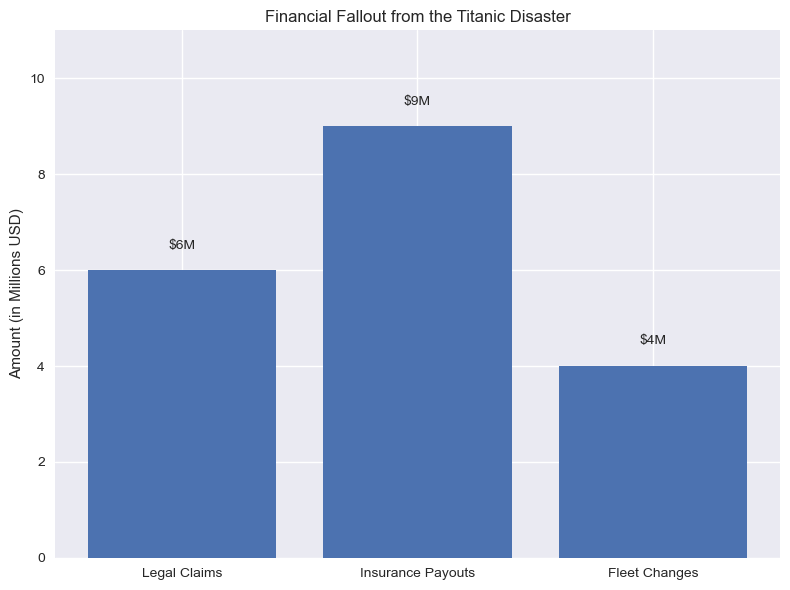

In [6]:
# Step 4 & 6: Analyze & Visualize

def plot_death_statistics(deaths):
    total, male, female = deaths['total'], deaths['male'], deaths['female']
    male_pct, female_pct = male / total * 100, female / total * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    create_bar_plot(
        axes[0], ['Total Deaths'], [total],
        'Total Deaths on Titanic', 'Number of People', '{:.0f}', 'red'
    )
    create_bar_plot(
        axes[1], ['Male', 'Female'], [male_pct, female_pct],
        'Death % by Gender', 'Percentage', '{:.1f} %', ['blue','pink']
    )
    plt.tight_layout()
    plt.show()

def plot_financial_fallout(categories, values):
    fig, ax = plt.subplots(figsize=(8, 6))
    create_bar_plot(
        ax, categories, values,
        'Financial Fallout from the Titanic Disaster',
        'Amount (in Millions USD)', '${:.0f}M'
    )
    ax.set_ylim(0, max(values) + 2)
    plt.tight_layout()
    plt.show()

plot_death_statistics(deaths)
plot_financial_fallout(fallout['categories'], fallout['values'])
